<h1>Linear Regression<h1>
<h2>A supervised learning algorithm used to predict a continuous target variable.<h2>
<h2>We provide a labeled example dataset for the algorithm to learn a function/equation which maps the features to the target variable.<h2>
<h2>We can then use this function to predict values for new unlabeled examples.<h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:/pandas Practice/startups.csv')
data.shape

(50, 5)

In [3]:
#The 'corrwith' function gives correlation coefficient b/w 'Column' and all other columns in 'data' dataframe.
#data.corrwith(data.Column)

In [4]:
data.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


<h3>Separate the features and target variable into 2 different objects.<h3>

In [5]:
X = data.iloc[:,:-1]
X.head(3)

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida


In [6]:
y = data['Profit']
y.head(3)

0    192261.83
1    191792.06
2    191050.39
Name: Profit, dtype: float64

In [7]:
#Include dummy variables for categorical column 'State'. 
#We use one-hot encoding with 'drop_first=True' to avoid dummy variable trap.
d1 = pd.get_dummies(X['State'],drop_first=True)
d1.head(3)

,Florida,New York
0,0,1
1,0,0
2,1,0


In [8]:
#Concatenate the dummies with the attributes in 'X' object.
X = pd.concat([X,d1],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,State,Florida,New York
0,165349.20,136897.80,471784.10,New York,0,1
1,162597.70,151377.59,443898.53,California,0,0
2,153441.51,101145.55,407934.54,Florida,1,0
3,144372.41,118671.85,383199.62,New York,0,1
4,142107.34,91391.77,366168.42,Florida,1,0


In [9]:
#Drop the unnecessary categorical column already converted to dummies.
X.drop('State',axis=1,inplace=True)
X.head(3)

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
#Predict the target values for training dataset.
predict_train = model.predict(X_train)
predict_train

array([ 91600.14454914, 127303.85418691, 159817.4674484 , 149975.44919571,
        47591.33506197,  43853.43843603, 102899.79205219, 144898.30983258,
        97297.37614133,  98034.70341583, 116412.31793249,  68882.09199702,
       115835.44141619,  60195.91211447, 152466.07130821, 127574.66890342,
       102570.51355568, 160797.38050908, 131109.05709646,  74731.13936062,
        47922.01283338, 189858.49131898, 128045.24213907,  84424.86168921,
       110493.04606916, 157207.88165555, 108335.42065747,  75478.6463131 ,
       119378.07429222, 115583.94277518, 152579.56080397,  80833.2810607 ,
        56824.73391802, 172102.0543758 , 192290.73607666,  47251.46890903,
        66410.00059878])

In [13]:
#Predict the target values for new examples in test dataset.
predict_test = model.predict(X_test)
predict_test

array([104440.72582616, 132253.81567698, 132872.07174272,  71707.78771428,
       178678.9934985 , 115078.13124331,  66093.9297267 ,  98759.7276409 ,
       114113.5994088 , 167979.49411476,  95786.77295823,  87785.3497979 ,
       110455.98228344])

In [14]:
#Or predict it for a specific set of feature vectors.
model.predict([[140000,130000,400000,0,0],[151000,140450,425000,0,1]])

array([169758.41285392, 179677.59576836])

In [15]:
#Get the R^2 of the model for test data and training data.
#The 'model' already has predicted values 
print(model.score(X_test,y_test)) 
print(model.score(X_train,y_train))

0.931581519915206
0.9511705268907698


In [16]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train,predict_train))
rmse_test = np.sqrt(mean_squared_error(y_test,predict_test))
rmse_train , rmse_test

(9271.313137818845, 8591.234654128652)

In [17]:
#Use 'OLS' function from stasmodels.api to get a full table with R^2, adj R^2 etc.
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
m = sm.OLS(y_train,X_train)
model = m.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     120.8
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           2.27e-19
Time:                        23:37:34   Log-Likelihood:                -390.48
No. Observations:                  37   AIC:                             793.0
Df Residuals:                      31   BIC:                             802.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.105e+04   8872.115      4.627      0.000     2.3e+04    5.91e+04
R&D Spend           0.7810      0.058     13.519      0.000       0.663       0.899
Administration      0.0458      0.071      0.648      0.522      -0.098       0.190
Marketing Spend     0.0335      0.021      1.631      0.113      -0.008       0.075
Florida          -521.7874   4531.982     -0.115      0.909   -9764.826    8721.251
New York           11.1512   3879.277      0.003      0.998   -7900.687    7922.989
==============================================================================
Omnibus:                       14.493   Durbin-Watson:                   2.411
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.461
Skew:                          -1.070   Prob(JB):                     5.94e-05
Kurtosis:                       5.837   Cond. No.                     1.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Compare the actual V/S predicted values in the test dataset.
comp = pd.DataFrame({'Actual':y_test,'Predicted':predict_test})
comp.head(4)

,Actual,Predicted
28,103282.38,104440.725826
11,144259.40,132253.815677
10,146121.95,132872.071743
41,77798.83,71707.787714


Text(0.5, 1.0, 'Actual vs Predicted')

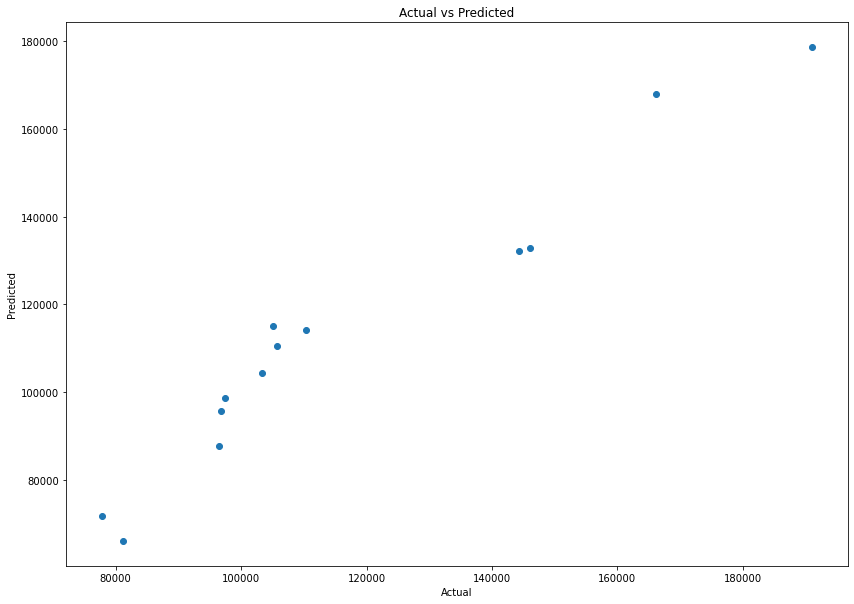

In [23]:
plt.rcParams['figure.figsize']=(14,10)
plt.scatter(y_test,predict_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

<h2>Algebra<h2>

In [20]:
#Create a matrix and calculate its inverse.
import numpy as np
A = np.array([[3,4],[2,16]])
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.4  , -0.1  ],
       [-0.05 ,  0.075]])

In [21]:
#Dot product of a matrix and its inverse gives an identity matrix.
A.dot(Ainv)

array([[1., 0.],
       [0., 1.]])

In [22]:
A.transpose() #Calculate transpose of matrix 'A'.

array([[ 3,  2],
       [ 4, 16]])